# Install libraries

In [ ]:
!pip install gdown

In [ ]:
!pip install matplotlib networkx numpy pandas plotly graphviz IPython pydot schemdraw

In [ ]:
!git clone https://github.com/yassinemaaroufi/MibianLib.git

In [ ]:
import gdown

url = 'https://drive.google.com/file/d/1m-BpHVlMj2AFkFE2bl_rn2GQ6W70KrWB/view?usp=sharing'
output_path = 'meta_history_data.csv'
gdown.download(url, output_path, quiet=False,fuzzy=True)

url = 'https://drive.google.com/file/d/1qiwBjfyzrwYYNPVdiTayVAfZF48KVhVM/view?usp=sharing'
output_path = 'mydiagram1.py'
gdown.download(url, output_path, quiet=False,fuzzy=True)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from scipy.stats import norm
from scipy.stats import kstest
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Task 1, 2
Calculate log-returns and plot graphs

In [6]:
df = pd.read_csv("meta_history_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date', ignore_index=True)
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
df

Date  Close/Last    Volume      Open       High        Low
0   2023-10-31      301.27  19434170   $303.31    $303.68    $296.86
1   2023-11-01      311.85  20434580   $301.85    $312.74    $301.85
2   2023-11-02      310.87  21631820   $317.30    $318.82    $308.33
3   2023-11-03      314.60  16764320   $312.55    $315.55  $311.0167
4   2023-11-06      315.80  12887700   $315.98    $318.33    $314.45
..         ...         ...       ...       ...        ...        ...
247 2024-10-24      567.78   7184651  $567.125  $568.8799    $561.52
248 2024-10-25      573.25  11337870  $573.935    $581.29    $571.72
249 2024-10-28      578.16  10925130   $582.00  $583.7499    $574.12
250 2024-10-29      593.28  13019090  $580.145    $593.67   $575.398
251 2024-10-30      591.80  26864930   $600.98    $601.20    $589.38

[252 rows x 6 columns]

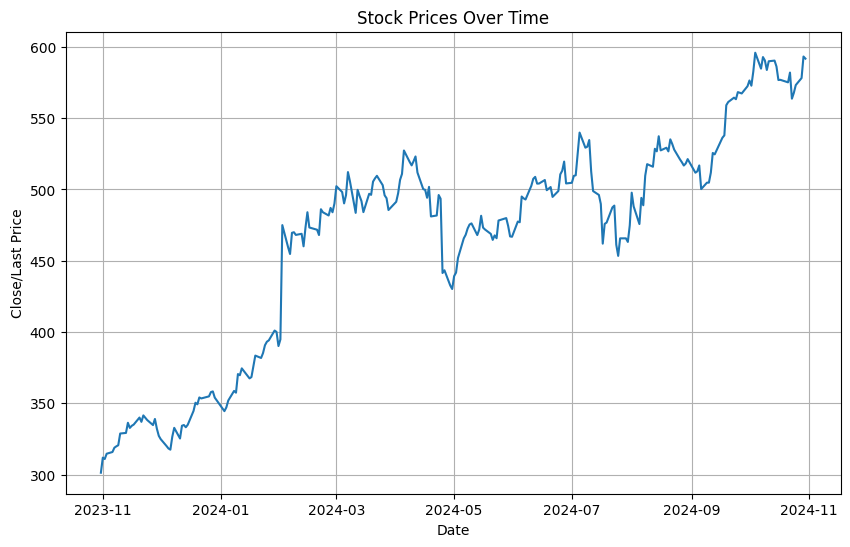

In [44]:
# Plotting
fig = plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Stock Prices Over Time')
plt.grid(True)
plt.show()

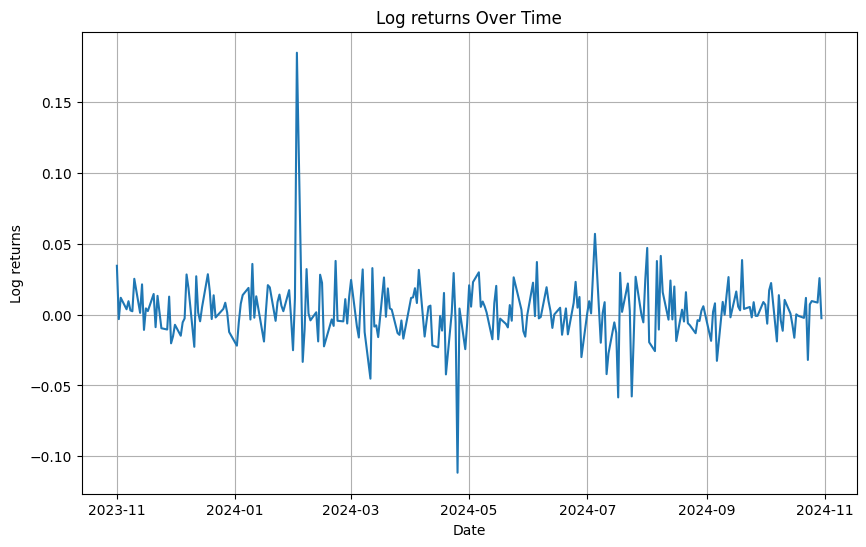

In [45]:
hi = np.log(df['Close/Last']).diff()[1:]
hi = hi.set_axis(np.arange(hi.size))
dates = df['Date'].iloc[1:]
dates = dates.set_axis(np.arange(dates.size))
fig = plt.figure(figsize=(10, 6))
plt.plot(dates, hi)
plt.xlabel('Date')
plt.ylabel('Log returns')
plt.title('Log returns Over Time')
plt.grid(True)
plt.show()

In [9]:
print(f"Outliers: h_{hi.argmax()}({dates[hi.argmax()]}) = {hi.max()}; h_{hi.argmin()}({dates[hi.argmin()]}) = {hi.min()}")

Outliers: h_63(2024-02-02 00:00:00) = 0.18496510346661132; h_120(2024-04-25 00:00:00) = -0.11161667645352313


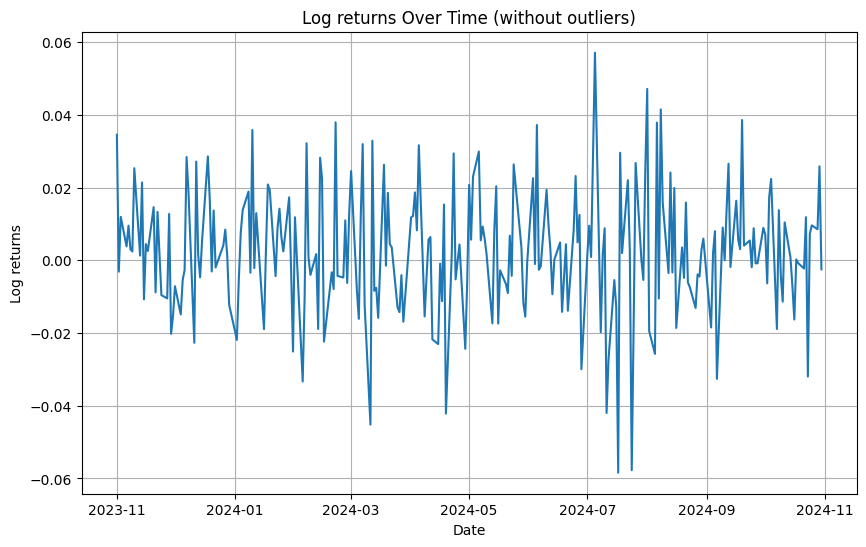

In [46]:
# q1, q2 = hi.quantile(0.03), hi.quantile(0.97)
q1, q2 = hi.min(), hi.max()
h_new = hi[(hi>q1) & (hi<q2)]
dates_new = dates[(hi>q1) & (hi<q2)]
fig = plt.figure(figsize=(10, 6))
plt.plot(dates_new, h_new)
plt.xlabel('Date')
plt.ylabel('Log returns')
plt.title('Log returns Over Time (without outliers)')
plt.grid(True)
plt.show()

# Normality and independence tests

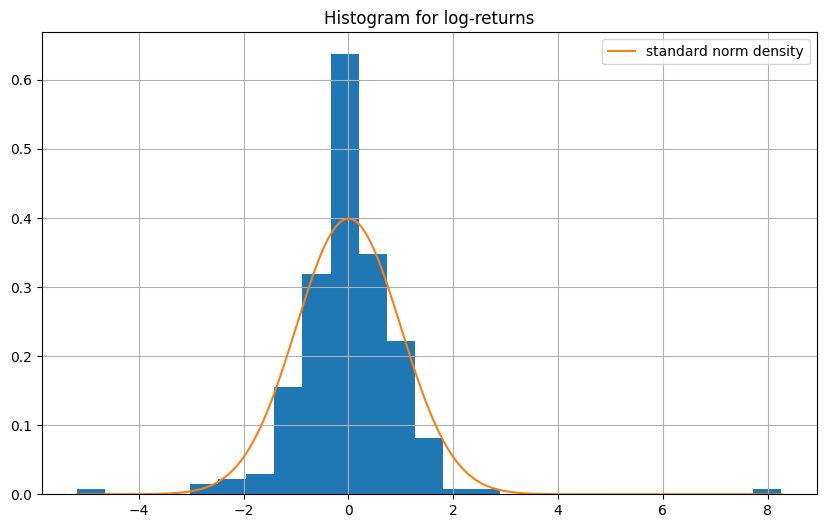

In [47]:
use_orig = True
if not use_orig:
  h_norm = (h_new-h_new.mean())/h_new.std()
  num_bins = 15
else:
  h_norm = (hi-hi.mean())/hi.std()
  num_bins = 25
fig = plt.figure(figsize=(10, 6))
a = plt.hist(h_norm, bins=num_bins, density=True)[1]
x = np.linspace(a.min(),a.max(),1000)
curve, = plt.plot(x, norm.pdf(x))
plt.title('Histogram for log-returns')
plt.legend([curve],['standard norm density'])
plt.grid(True)
plt.show()

In [12]:
# Kolmogirov-Smirnov test
thresh = 0.05
statist = kstest(h_norm, norm.cdf)
p_value = statist.pvalue
print("null hypothesis - 'log-returns follow normal distribution'")
print(f"p-value = {p_value}")
if p_value<thresh:
  print("null hypothesis rejected => log-returns don't follow normal distribution")
else:
  print("null hypothesis isn't rejected => log-returns follow normal distribution")

null hypothesis - 'log-returns follow normal distribution'
p-value = 0.04827452983137437
null hypothesis rejected => log-returns don't follow normal distribution


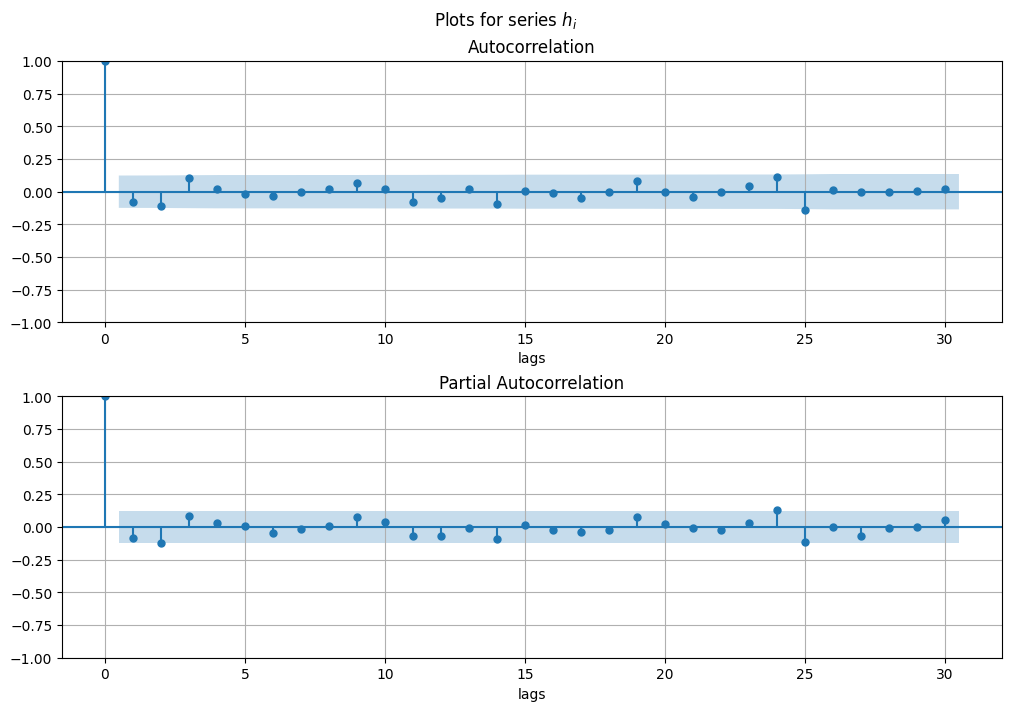

We can see that acf and pacf don't take any significant values except lag=0, so series of log-returns uncorrelated
However at some lags acf and pacf are near bound, so maybe there exist non linear dependecies


In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)
fig.suptitle("Plots for series $h_i$")
plot_acf(h_norm, ax=ax1, lags=30)
ax1.grid(True)
ax1.set_xlabel("lags")
plot_pacf(h_norm, ax=ax2, lags=30)
ax2.grid(True)
ax2.set_xlabel("lags")
plt.show()
print("We can see that acf and pacf don't take any significant values except lag=0, so series of log-returns uncorrelated")
print("However at some lags acf and pacf are near bound, so maybe there exist non linear dependecies")

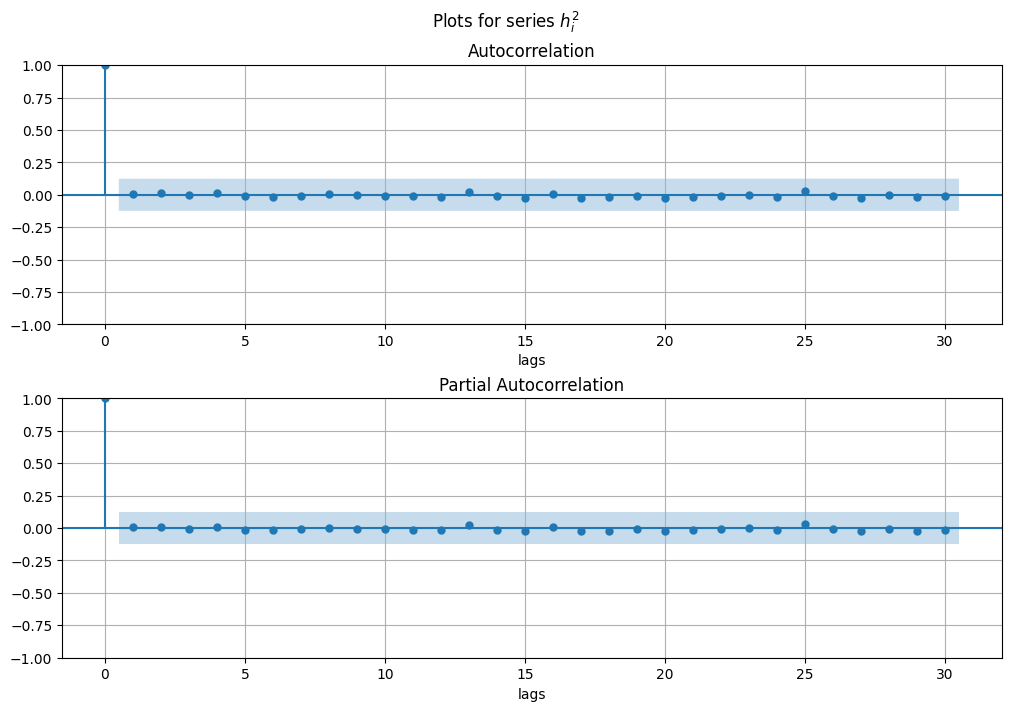

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)
fig.suptitle("Plots for series $h_i^2$")
h_norm2 = h_norm**2
plot_acf(h_norm2, ax=ax1, lags=30)
ax1.grid(True)
ax1.set_xlabel("lags")
plot_pacf(h_norm2, ax=ax2, lags=30)
ax2.grid(True)
ax2.set_xlabel("lags")
plt.show()

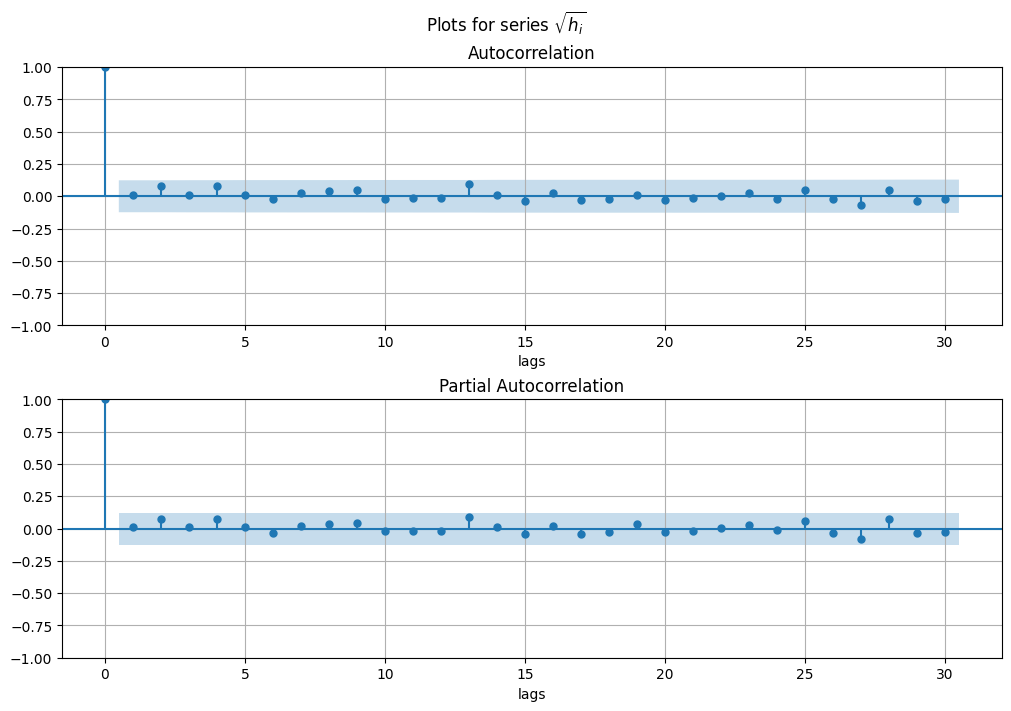

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), constrained_layout=True)
fig.suptitle("Plots for series $\sqrt{h_i}$")
h_norm_sqrt = np.sqrt(h_norm**2)
plot_acf(h_norm_sqrt, ax=ax1, lags=30)
ax1.grid(True)
ax1.set_xlabel("lags")
plot_pacf(h_norm_sqrt, ax=ax2, lags=30)
ax2.grid(True)
ax2.set_xlabel("lags")
plt.show()

On the last 2 figures can be seen weak effect from non linear dependencies (at lag=5). But if we consider whole data (with outliers) there won't be any dependency.

In [16]:
# print(acf(h_norm_sqrt, nlags=30))
# print(pacf(h_norm_sqrt, nlags=30))
# print(acf(h_norm_sqrt, nlags=30) - pacf(h_norm_sqrt, nlags=30))

# Task 3, 4, 6
For series of returns calculate sample mean, sample variance and volatility. Also plot binary tree approximation model fot T = 10 days.

In [17]:
use_orig = True
dt = 1/252
if use_orig:
  nu = hi.mean()
  s2 = (hi.std())**2
else:
  nu = h_new.mean()
  s2 = (h_new.std())**2
sigm2 = s2/dt
print(f'nu = {np.round(nu, 5)}; s^2 = {np.round(s2, 5)}; sigma^2 = {np.round(sigm2, 5)}; sigma = {np.sqrt(sigm2)}')

nu = 0.00269; s^2 = 0.00049; sigma^2 = 0.12256; sigma = 0.3500845097617296


In [18]:
use_nu = True
if use_nu:
  u = np.exp(np.sqrt(sigm2*dt)+nu*dt)
  d = np.exp(-np.sqrt(sigm2*dt)+nu*dt)
else:
  u = np.exp(np.sqrt(sigm2*dt))
  d = np.exp(-np.sqrt(sigm2*dt))
print(f'u = {u}; d = {d}')

u = 1.0223091338664045; d = 0.9781985853560478


In [19]:
T = 10
s0 = df['Close/Last'].iloc[0]
si = [np.array([s0])]
for t in range(1,T+1):
  st = d*si[-1][0]*np.ones((t+1))
  st[1:] = si[-1]*u
  si.append(st)

# si

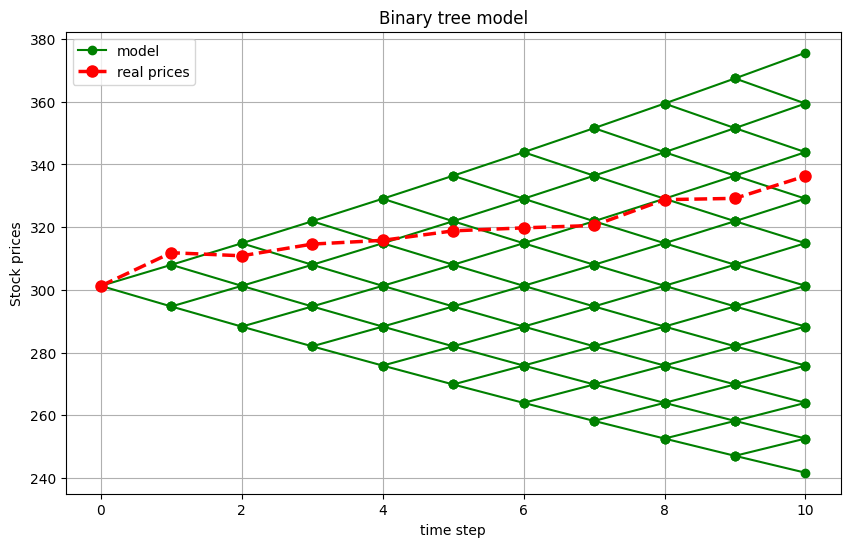

In [49]:
fig = plt.figure(figsize=(10, 6))
for t in range(1,T+1):
  for i in range(t):
    plt.plot([t-1, t], [si[t-1][i],si[t][i]], marker='o', color='green')
    tree, = plt.plot([t-1, t], [si[t-1][i],si[t][i+1]], marker='o', color='green')


stock, = plt.plot(df['Close/Last'].iloc[:T+1], linestyle='dashed', color='red', marker='o', linewidth=2.5, markersize=8)
plt.xlabel('time step')
plt.ylabel('Stock prices')
plt.title('Binary tree model')
plt.grid(True)
plt.legend([tree, stock], ['model', 'real prices'])
plt.show()

In [50]:
from mydiagram1 import BinaryTree

def stock_graph(s0, u, d, T):
  nodes = []
  edges = []
  k = 0
  off = 0
  for i in range(T+1):
    for j in range(i+1):
      nodes.append((k,f'S_{i}={np.round(s0*d**(i-j)*u**(j),2)}','white'))     # from up to down
      if i!=T:
        edges.append((k,k+1+off,k+2+off))
      k += 1
    off += 1

  graph = {'root':0, 'nodes':nodes, 'edges':edges}
  return graph

binomial tree model


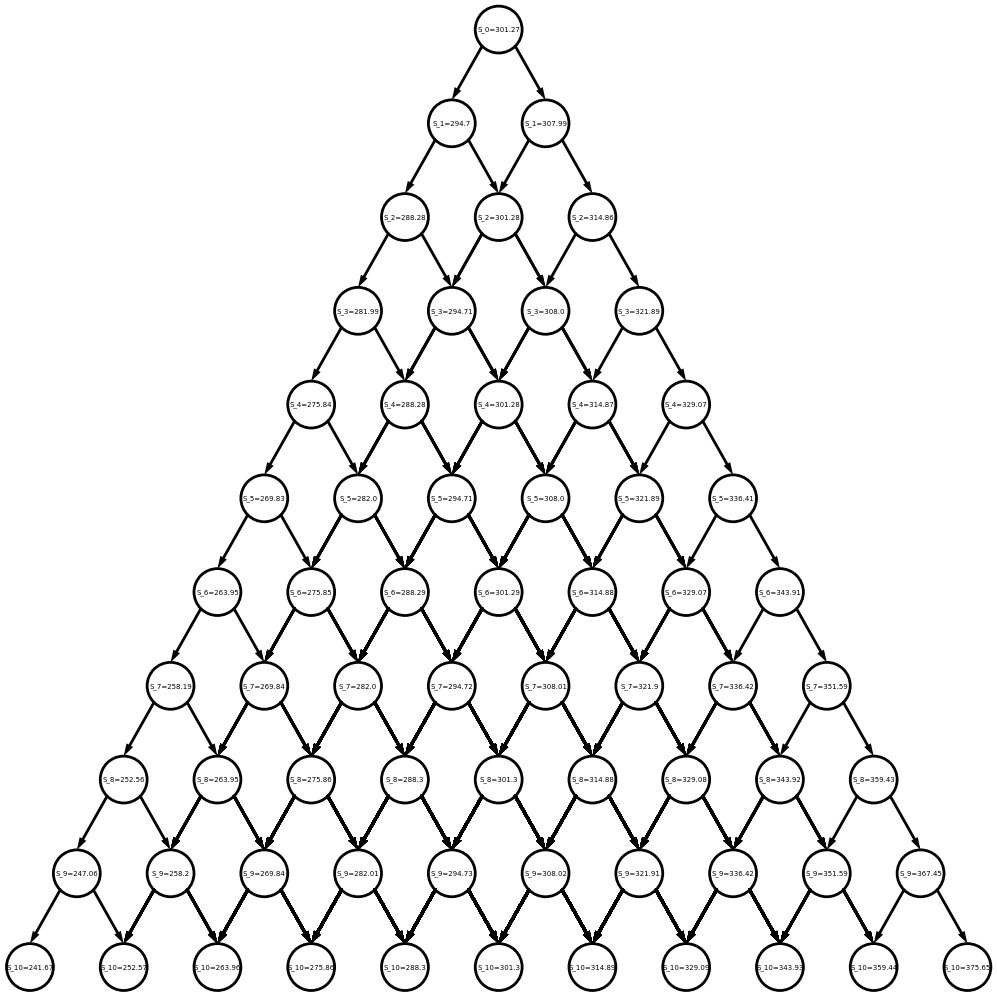

In [51]:
graph = stock_graph(s0, u, d, T)
tree = BinaryTree()
tree.create_tree(graph)
print("binomial tree model")
tree.draw(filename='binary model')

# Task 7
Calculate prices for call and put options (exp.dates below)

Today is 5th of November and price of meta stock = 560.68 \$;
</br>Let K (strike price) = 570 $;

## Options

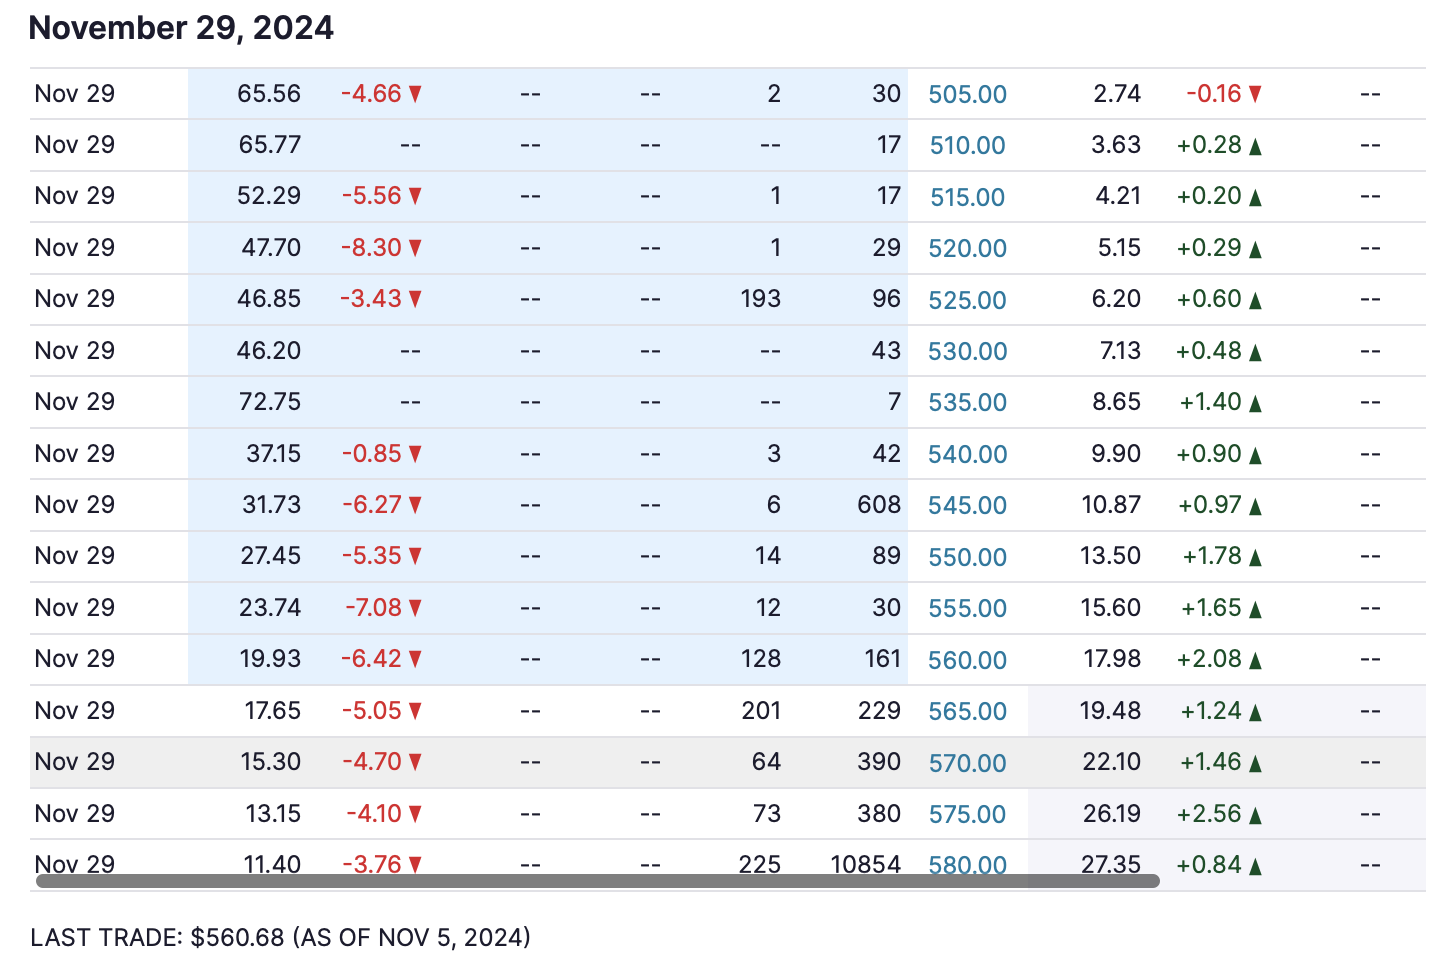

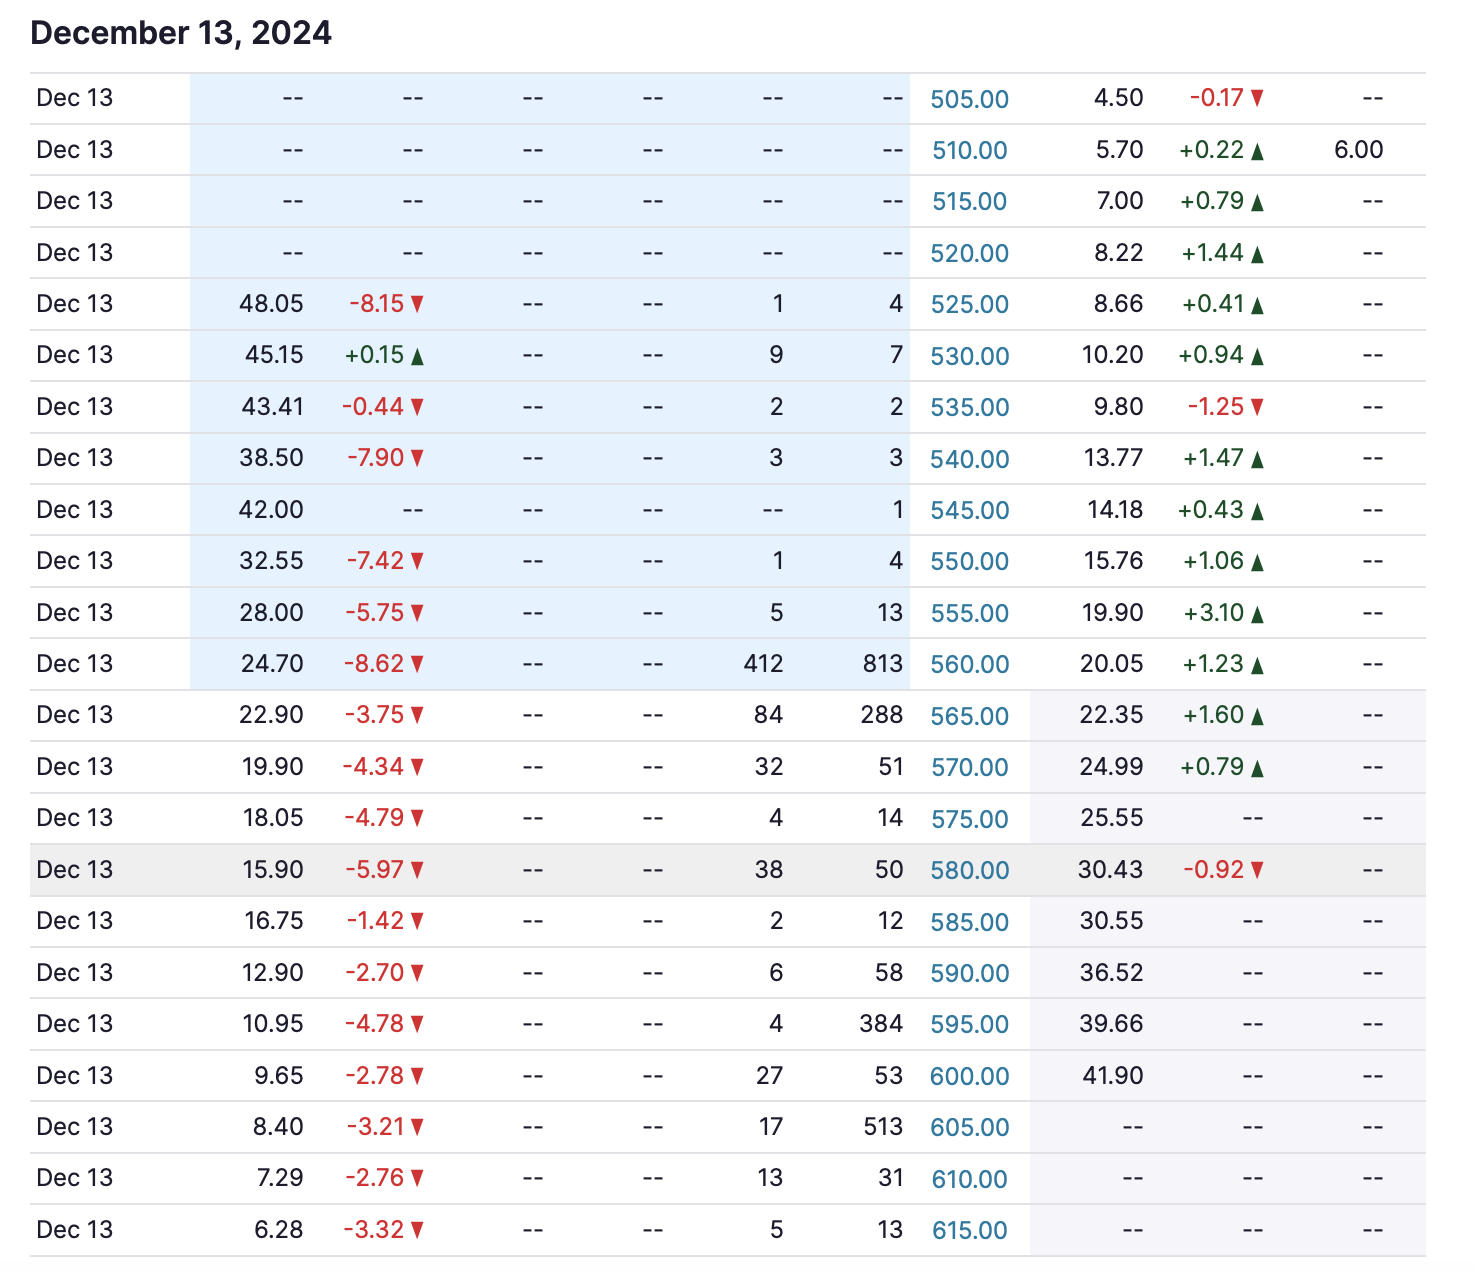

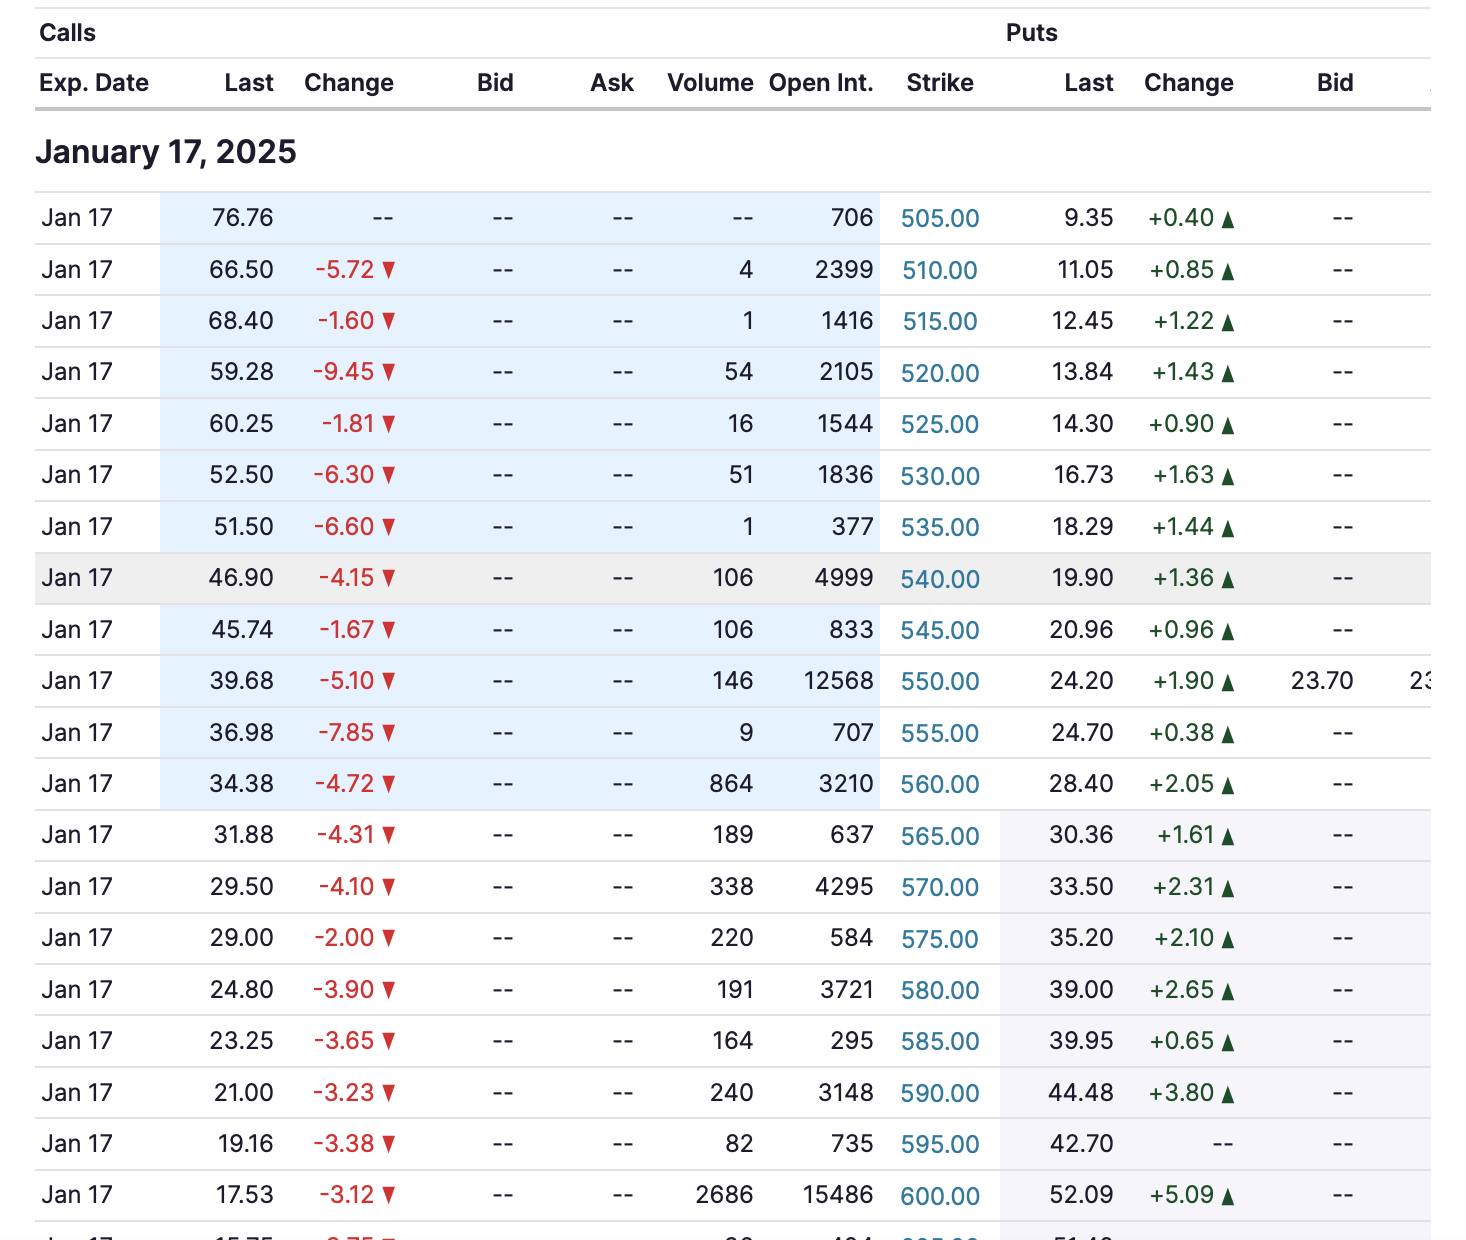

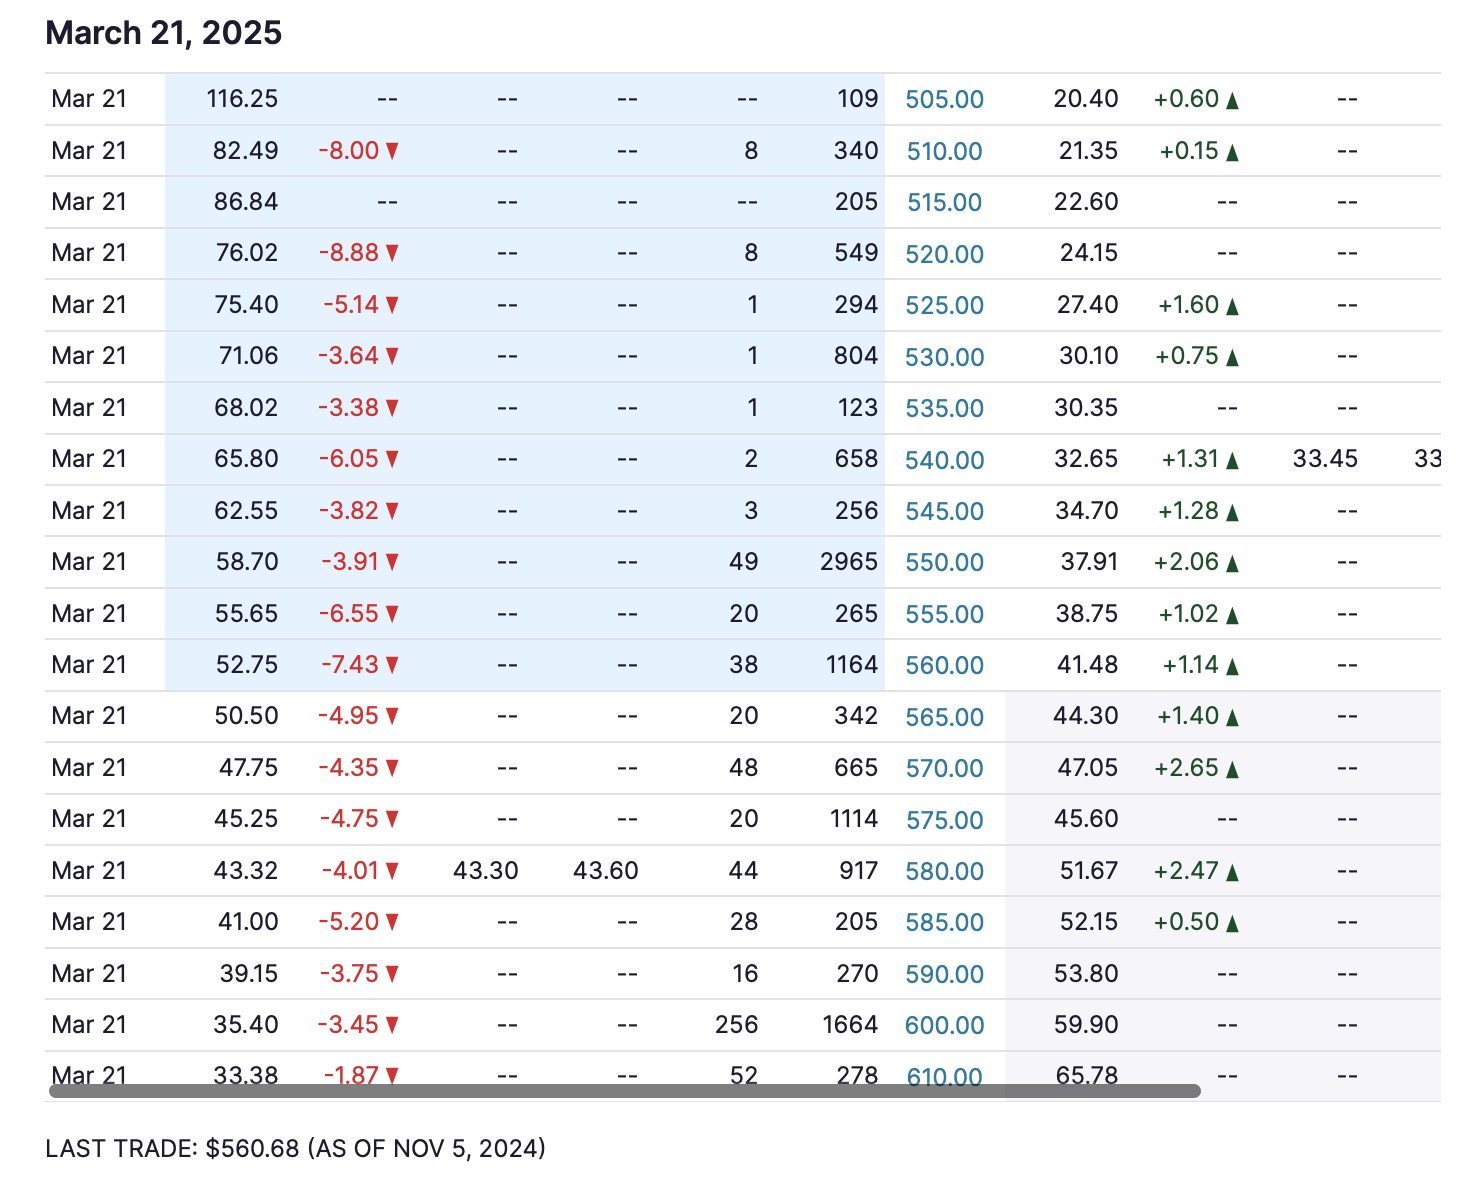

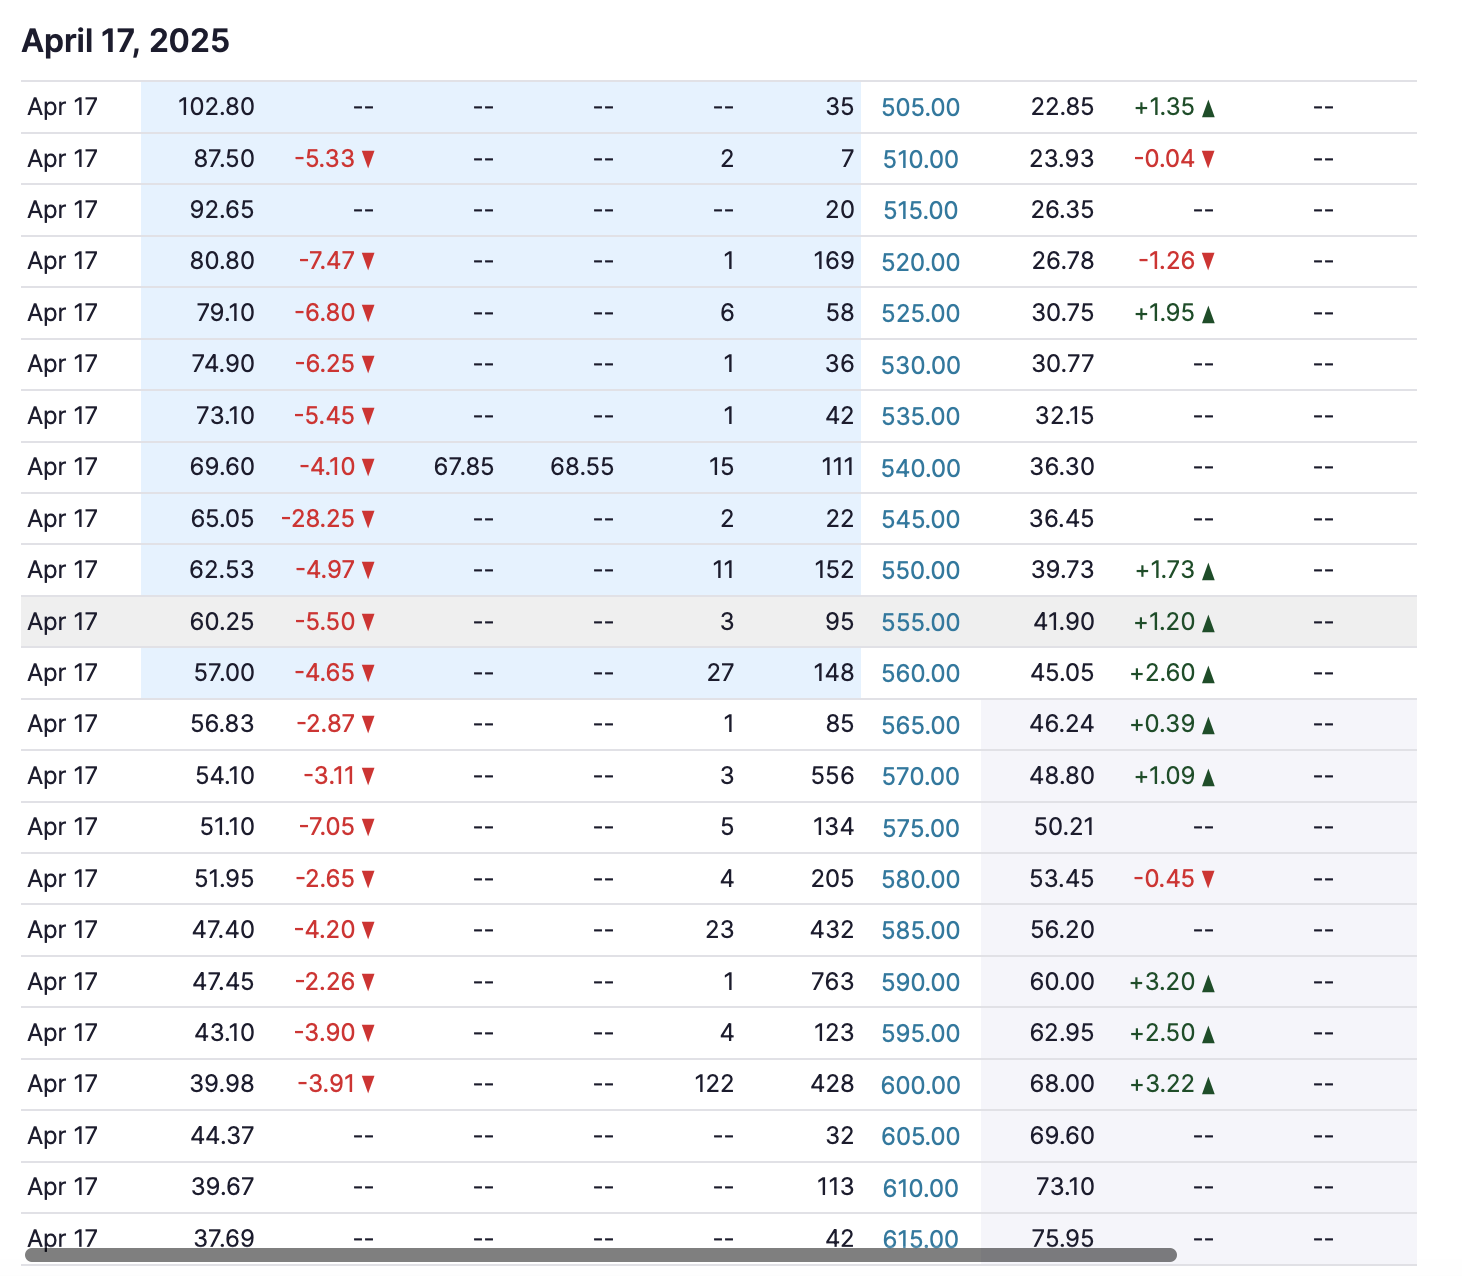

## Task solution

In [ ]:
def call_price(s,k,t,sig,r):
  d = np.log((s*np.exp(r*t))/k)/(sig*np.sqrt(t))
  d1 = d + (sig*np.sqrt(t))/2
  d2 = d - (sig*np.sqrt(t))/2
  price = s*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2)
  return price

def put_price(s,k,t,sig,r):
  return call_price(s,k,t,sig,r)+k*np.exp(-r*t)-s


In [ ]:
end_dates = pd.to_datetime(pd.Series(['2024-11-29', '2024-12-13', '2025-01-17', '2025-03-21', '2025-04-17']))
current_date = datetime(2024, 11, 5)
ts = (end_dates-current_date).dt.days/365
k = 570
s = 560.68
r = nu+sigm2/2

calls = []
puts = []

print(f'R = {r}')
print(f'r_fact = {np.exp(r)-1}')
for t in ts:
  calls.append(call_price(s,k,t,np.sqrt(sigm2),r))
  puts.append(put_price(s,k,t,np.sqrt(sigm2),r))

R = 0.06396946990517868
r_fact = 0.06605985135632308


In [ ]:
true_calls = [15.3,19.9,29.5,47.75,54.1]
true_puts = [22.1,29.99,33.5,47.05,48.8]

d = {}
d['exp.date'] = end_dates
d['T'] = ts
d['call_theor'] = calls
d['call_true'] = true_calls
d['put_theor'] = puts
d['put_true'] = true_puts
table_res7 = pd.DataFrame(d).T
table_res7

0                    1                    2  \
exp.date    2024-11-29 00:00:00  2024-12-13 00:00:00  2025-01-17 00:00:00   
T                      0.065753              0.10411                  0.2   
call_theor            16.921757            22.705259            34.021477   
call_true                  15.3                 19.9                 29.5   
put_theor             23.849251            28.241765            36.095409   
put_true                   22.1                29.99                 33.5   

                              3                    4  
exp.date    2025-03-21 00:00:00  2025-04-17 00:00:00  
T                      0.372603             0.446575  
call_theor              49.6145            55.332103  
call_true                 47.75                 54.1  
put_theor             45.509071            48.599191  
put_true                  47.05                 48.8

In [ ]:
print('mae for call =', np.abs(table_res7.loc['call_theor']-table_res7.loc['call_true']).mean())
print('mae for put =', np.abs(table_res7.loc['put_theor']-table_res7.loc['put_true']).mean())

mae for call = 2.4090191474649565
mae for put = 1.5669265141523474


In [ ]:
# Testing with mibian
from MibianLib.mibian import BS
end_dates = pd.to_datetime(pd.Series(['2024-11-29', '2024-12-13', '2025-01-17', '2025-03-21', '2025-04-17']))
current_date = datetime(2024, 11, 5)
days_arr = (end_dates-current_date).dt.days
k = 570
s = 560.68
r = nu+sigm2/2
options_mib = []
calls = []
puts = []

for days in days_arr:
  options_mib.append(BS([s, k, r*100, days], volatility=np.sqrt(sigm2)*100))
  calls.append(options_mib[-1].callPrice)
  puts.append(options_mib[-1].putPrice)

pd.DataFrame({'calls_mibian': calls, 'puts_mibian': puts}).T

0          1          2          3          4
calls_mibian  16.921757  22.705259  34.021477  49.614500  55.332103
puts_mibian   23.849251  28.241765  36.095409  45.509071  48.599191

# Task 8
Greeks for options from previous task

## Formulas for greeks

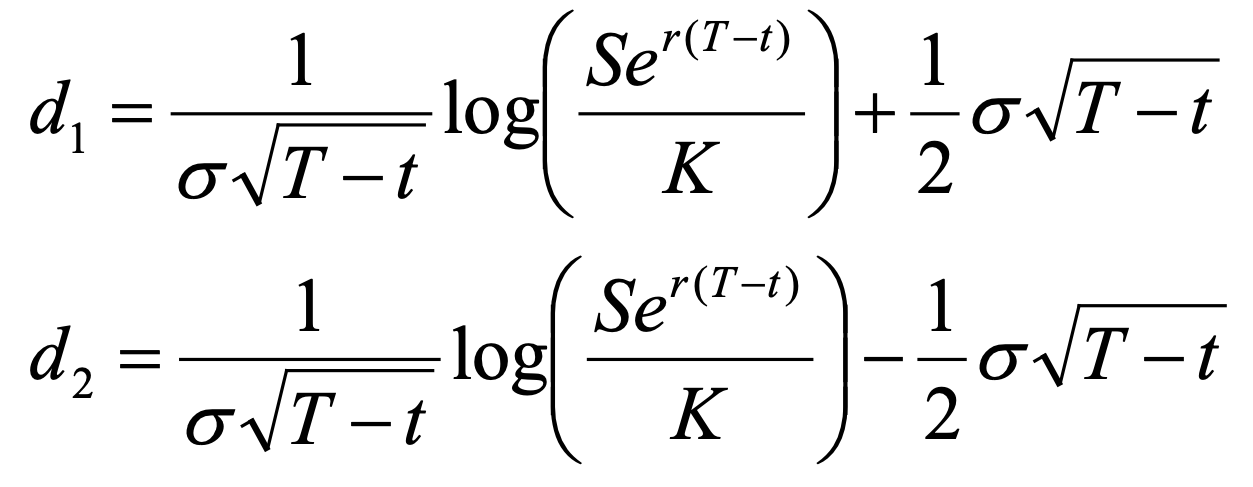

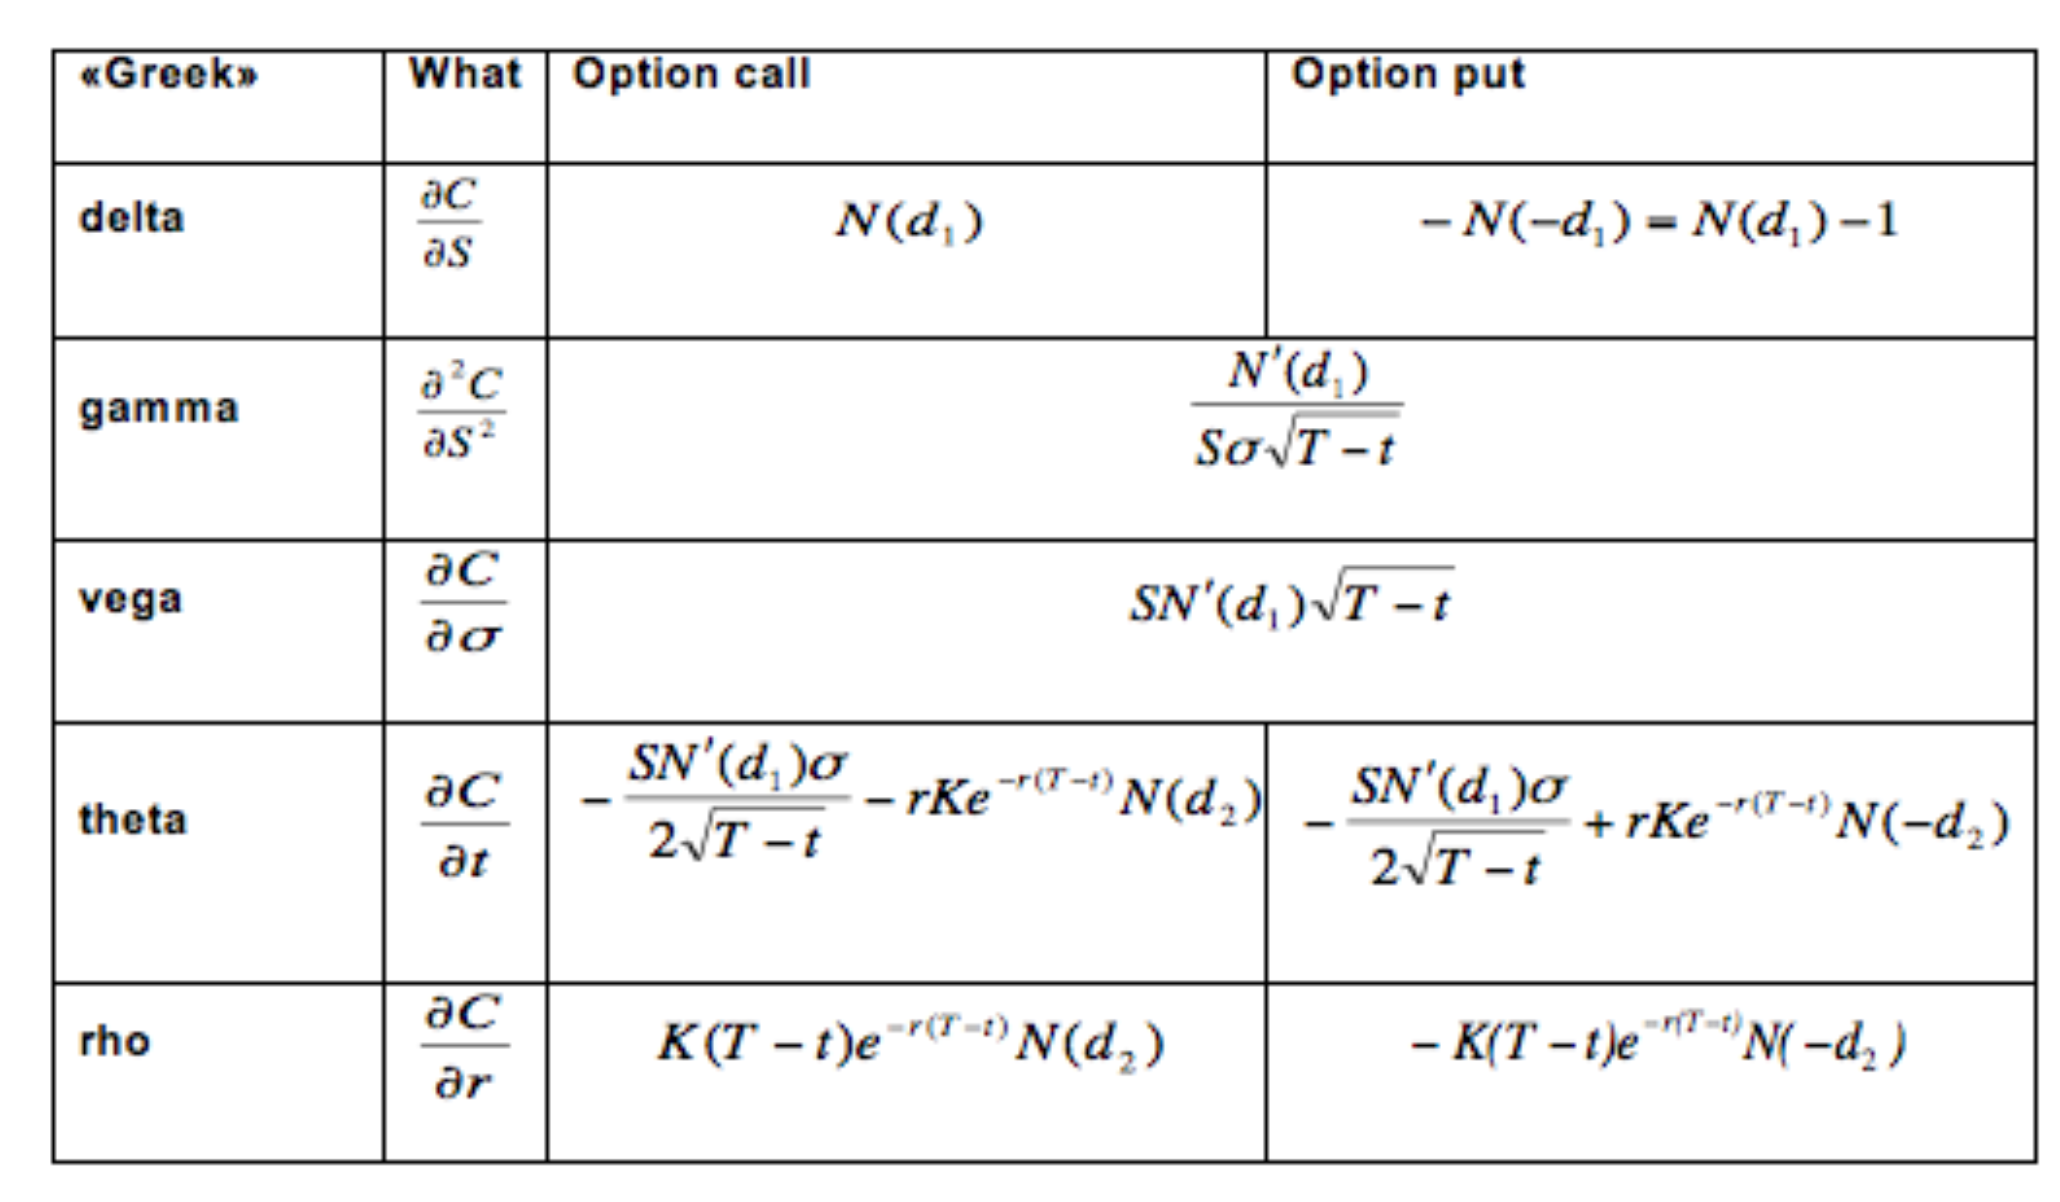

## Task solution

In [ ]:
def greeks(t, s,k,sig,r):
  res = {}
  d = np.log((s*np.exp(r*t))/k)/(sig*np.sqrt(t))
  d1 = d + (sig*np.sqrt(t))/2
  d2 = d - (sig*np.sqrt(t))/2
  res['callDelta'] = norm.cdf(d1)
  res['putDelta'] = norm.cdf(d1)-1

  res['gamma'] = norm.pdf(d1)/(s*sig*np.sqrt(t))
  res['vega'] = s*norm.pdf(d1)*np.sqrt(t)

  res['callTheta'] = -(s*norm.pdf(d1)*sig)/(2*np.sqrt(t)) - r*k*np.exp(-r*t)*norm.cdf(d2)
  res['putTheta'] = -(s*norm.pdf(d1)*sig)/(2*np.sqrt(t)) + r*k*np.exp(-r*t)*norm.cdf(-d2)

  res['callRho'] = k*t*np.exp(-r*t)*norm.cdf(d2)
  res['putRho'] = -k*t*np.exp(-r*t)*norm.cdf(-d2)

  return res

In [ ]:
d = {}
d['exp.date'] = end_dates
d['T'] = ts

a = 0
for date,t in zip(end_dates,ts):
  res = greeks(t, s,k,np.sqrt(sigm2),r)
  if a==0:
    for key in res:
      d[key] = []
    a += 1
  for key in res:
    d[key].append(res[key])

table_res8 = pd.DataFrame(d).T
table_res8

0                    1                    2  \
exp.date   2024-11-29 00:00:00  2024-12-13 00:00:00  2025-01-17 00:00:00   
T                     0.065753              0.10411                  0.2   
callDelta             0.463386              0.48783             0.521811   
putDelta             -0.536614             -0.51217            -0.478189   
gamma                 0.007893             0.006296             0.004538   
vega                 57.114991            72.138708            99.882737   
callTheta           -167.58339          -137.333015          -103.957637   
putTheta           -131.273839          -101.112446           -67.958566   
callRho              15.970821            26.111858            51.709479   
putRho              -21.351316           -32.836709           -60.841308   

                             3                    4  
exp.date   2025-03-21 00:00:00  2025-04-17 00:00:00  
T                     0.372603             0.446575  
callDelta             0.556159              0.56695  
putDelta             -0.443841             -0.43305  
gamma                 0.003297             0.002998  
vega                135.181238           147.366517  
callTheta           -80.279403           -74.557526  
putTheta            -44.675623           -39.121825  
callRho              97.701246           117.246328  
putRho             -109.679964          -130.132782

In [ ]:
# Testing with mibian
d = {}
for key in table_res8.index:
  d[key] = [] if key not in ['exp.date', 'T'] else np.array(table_res8.loc[key])

keys = options_mib[0].__dict__.keys()
for option in options_mib:
  for key in keys:
    if key in d.keys():
      d[key].append(option.__dict__[key])

print('mibian results:')
mib_res = pd.DataFrame(d).T
mib_res.loc['callTheta'] = 365*mib_res.loc['callTheta']
mib_res.loc['putTheta'] = 365*mib_res.loc['putTheta']
mib_res.loc['vega'] = 100*mib_res.loc['vega']
mib_res.loc['callRho'] = 100*mib_res.loc['callRho']
mib_res.loc['putRho'] = 100*mib_res.loc['putRho']
print(mib_res)
print('\ndiff(mibian_res-my_res):')
np.abs(mib_res-table_res8)

mibian results:
                             0                    1                    2  \
exp.date   2024-11-29 00:00:00  2024-12-13 00:00:00  2025-01-17 00:00:00   
T                     0.065753              0.10411                  0.2   
callDelta             0.463386              0.48783             0.521811   
putDelta             -0.536614             -0.51217            -0.478189   
gamma                 0.007893             0.006296             0.004538   
vega                 57.114991            72.138708            99.882737   
callTheta           -167.58339          -137.333015          -103.957637   
putTheta           -131.273839          -101.112446           -67.958566   
callRho              15.970821            26.111858            51.709479   
putRho              -21.351316           -32.836709           -60.841308   

                             3                    4  
exp.date   2025-03-21 00:00:00  2025-04-17 00:00:00  
T                     0.372603         

0                1                2                3  \
exp.date   0 days 00:00:00  0 days 00:00:00  0 days 00:00:00  0 days 00:00:00   
T                      0.0              0.0              0.0              0.0   
callDelta              0.0              0.0              0.0              0.0   
putDelta               0.0              0.0              0.0              0.0   
gamma                  0.0              0.0              0.0              0.0   
vega                   0.0              0.0              0.0              0.0   
callTheta              0.0              0.0              0.0              0.0   
putTheta               0.0              0.0              0.0              0.0   
callRho                0.0              0.0              0.0              0.0   
putRho                 0.0              0.0              0.0              0.0   

                         4  
exp.date   0 days 00:00:00  
T                      0.0  
callDelta              0.0  
putDelta               0.0  
gamma                  0.0  
vega                   0.0  
callTheta              0.0  
putTheta               0.0  
callRho                0.0  
putRho                 0.0

# Task 9
Delta hedging for the first 20 weeks

In [ ]:
def make_hedg_table(start, str_pr=400,call=True):
  d = {}
  d['Date'] = np.array(df['Date'][start:start+105:5])
  d['Stock price'] = np.array(df['Close/Last'][start:start+105:5])
  si = d['Stock price']
  step = -7/365
  sig = np.sqrt(sigm2)
  ti = np.array([(20*7)/365+i*step for i in range(len(si))])[:-1]
  # ti[20] = 0
  d1 = np.zeros((si.size))
  d1[:-1] = np.log((si[:-1]*np.exp(r*ti))/str_pr)/(sig*np.sqrt(ti))
  d1[:-1] += (sig*np.sqrt(ti))/2
  d1[-1] = np.log((si[-1]/str_pr)/(sig*(1e-12)))
  d['Delta'] = norm.cdf(d1) if call else norm.cdf(d1)-1

  d_delta = np.diff(d['Delta'], prepend=[0])
  d_delta[0] = d['Delta'][0]
  d['Stocks purchased'] = (10**5)*d_delta
  d['Cost of purchased stocks'] = d['Stock price']*d['Stocks purchased']

  r_week = (7/365)*r
  d['Cumuliative cost including interest'] = d['Cost of purchased stocks'].copy()
  d['Interest cost'] = r_week*d['Cumuliative cost including interest'][0]*np.ones((21))
  for row in range(1,21):
    d['Cumuliative cost including interest'][row] += d['Cumuliative cost including interest'][row-1]+d['Interest cost'][row-1]
    d['Interest cost'][row] = r_week*d['Cumuliative cost including interest'][row]
  return pd.DataFrame(d), d['Stock price'][[0,-1]]

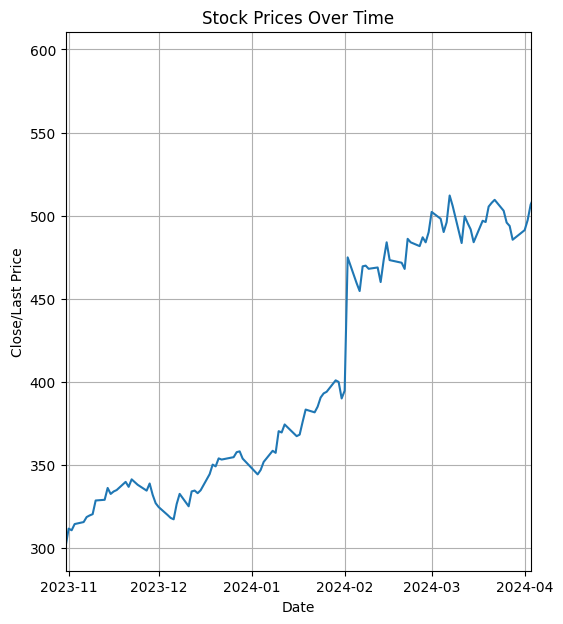

In [ ]:
start = 0
term = 105
plt.figure(figsize=(6, 7))
plt.plot(df['Date'], df['Close/Last'])
plt.xlim(df['Date'][start],df['Date'][start+term])
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('Stock Prices Over Time')
plt.grid(True)
plt.show()

In [ ]:
strike_price = 370
hedg_tables = {}
hedg_tables['call'], prices = make_hedg_table(start, strike_price, call=True)
hedg_tables['put'],_ = make_hedg_table(start, strike_price, call=False)
print('Delta hedging for call option')
hedg_tables['call']

Delta hedging for call option


Date  Stock price     Delta  Stocks purchased  \
0  2023-10-31       301.27  0.233853      23385.253258   
1  2023-11-07       318.82  0.312589       7873.689727   
2  2023-11-14       336.31  0.399770       8718.106051   
3  2023-11-21       336.98  0.396135       -363.527228   
4  2023-11-29       332.20  0.360350      -3578.565636   
5  2023-12-06       317.45  0.266340      -9400.958074   
6  2023-12-13       334.74  0.356920       9058.006047   
7  2023-12-20       349.28  0.439971       8305.091944   
8  2023-12-28       358.32  0.492275       5230.429736   
9  2024-01-05       351.95  0.441677      -5059.795519   
10 2024-01-12       374.49  0.593033      15135.551090   
11 2024-01-22       381.78  0.642118       4908.469938   
12 2024-01-29       401.02  0.766463      12434.507452   
13 2024-02-05       459.41  0.965504      19904.093820   
14 2024-02-12       468.90  0.982832       1732.894702   
15 2024-02-20       471.75  0.990659        782.679576   
16 2024-02-27       487.05  0.998326        766.665681   
17 2024-03-05       490.22  0.999705        137.925858   
18 2024-03-12       499.75  0.999996         29.060981   
19 2024-03-19       496.24  1.000000          0.420545   
20 2024-03-26       495.89  1.000000          0.000052   

    Cost of purchased stocks  Cumuliative cost including interest  \
0               7.045275e+06                         7.045275e+06   
1               2.510290e+06                         9.564208e+06   
2               2.931986e+06                         1.250793e+07   
3              -1.225014e+05                         1.240077e+07   
4              -1.188800e+06                         1.122719e+07   
5              -2.984334e+06                         8.256625e+06   
6               3.032077e+06                         1.129883e+07   
7               2.900803e+06                         1.421350e+07   
8               1.874168e+06                         1.610510e+07   
9              -1.780795e+06                         1.434406e+07   
10              5.668113e+06                         2.002977e+07   
11              1.873956e+06                         2.192830e+07   
12              4.986486e+06                         2.694169e+07   
13              9.144140e+06                         3.611888e+07   
14              8.125543e+05                         3.697575e+07   
15              3.692291e+05                         3.739034e+07   
16              3.734045e+05                         3.780961e+07   
17              6.761401e+04                         3.792361e+07   
18              1.452323e+04                         3.798466e+07   
19              2.086912e+02                         3.803147e+07   
20              2.555635e-02                         3.807813e+07   

    Interest cost  
0     8643.226469  
1    11733.483056  
2    15344.873014  
3    15213.412121  
4    13773.642911  
5    10129.324384  
6    13861.538785  
7    17437.282897  
8    19757.925976  
9    17597.464958  
10   24572.760794  
11   26901.897762  
12   33052.381169  
13   44311.068312  
14   45362.280847  
15   45870.906413  
16   46385.278433  
17   46525.134105  
18   46600.028950  
19   46657.454438  
20   46714.694382

In [ ]:
print('Delta hedging for put option')
hedg_tables['put']

Delta hedging for put option


Date  Stock price         Delta  Stocks purchased  \
0  2023-10-31       301.27 -7.661475e-01     -76614.746742   
1  2023-11-07       318.82 -6.874106e-01       7873.689727   
2  2023-11-14       336.31 -6.002295e-01       8718.106051   
3  2023-11-21       336.98 -6.038648e-01       -363.527228   
4  2023-11-29       332.20 -6.396504e-01      -3578.565636   
5  2023-12-06       317.45 -7.336600e-01      -9400.958074   
6  2023-12-13       334.74 -6.430800e-01       9058.006047   
7  2023-12-20       349.28 -5.600290e-01       8305.091944   
8  2023-12-28       358.32 -5.077247e-01       5230.429736   
9  2024-01-05       351.95 -5.583227e-01      -5059.795519   
10 2024-01-12       374.49 -4.069672e-01      15135.551090   
11 2024-01-22       381.78 -3.578825e-01       4908.469938   
12 2024-01-29       401.02 -2.335374e-01      12434.507452   
13 2024-02-05       459.41 -3.449647e-02      19904.093820   
14 2024-02-12       468.90 -1.716753e-02       1732.894702   
15 2024-02-20       471.75 -9.340731e-03        782.679576   
16 2024-02-27       487.05 -1.674074e-03        766.665681   
17 2024-03-05       490.22 -2.948158e-04        137.925858   
18 2024-03-12       499.75 -4.205965e-06         29.060981   
19 2024-03-19       496.24 -5.153633e-10          0.420545   
20 2024-03-26       495.89  0.000000e+00          0.000052   

    Cost of purchased stocks  Cumuliative cost including interest  \
0              -2.308172e+07                        -2.308172e+07   
1               2.510290e+06                        -2.059975e+07   
2               2.931986e+06                        -1.769304e+07   
3              -1.225014e+05                        -1.783725e+07   
4              -1.188800e+06                        -1.904793e+07   
5              -2.984334e+06                        -2.205563e+07   
6               3.032077e+06                        -1.905061e+07   
7               2.900803e+06                        -1.617318e+07   
8               1.874168e+06                        -1.431885e+07   
9              -1.780795e+06                        -1.611722e+07   
10              5.668113e+06                        -1.046888e+07   
11              1.873956e+06                        -8.607763e+06   
12              4.986486e+06                        -3.631837e+06   
13              9.144140e+06                         5.507847e+06   
14              8.125543e+05                         6.327158e+06   
15              3.692291e+05                         6.704149e+06   
16              3.734045e+05                         7.085779e+06   
17              6.761401e+04                         7.162086e+06   
18              1.452323e+04                         7.185395e+06   
19              2.086912e+02                         7.194419e+06   
20              2.555635e-02                         7.203245e+06   

    Interest cost  
0   -28316.931172  
1   -25272.017740  
2   -21706.026566  
3   -21882.941938  
4   -23368.221390  
5   -27058.105993  
6   -23371.513569  
7   -19841.447403  
8   -17566.538308  
9   -19772.789418  
10  -12843.339850  
11  -10560.105393  
12   -4455.580811  
13    6757.091123  
14    7762.231997  
15    8224.729382  
16    8692.916629  
17    8786.530869  
18    8815.127551  
19    8826.198078  
20    8837.026193

In [ ]:
last_price = prices[-1]
start_price = prices[0]

## Call option

In [ ]:
option = 'call'
print(f'Delta hedging for {option} option')
hedg_table = hedg_tables[option]
mask = (hedg_table['Stocks purchased']>0)
total_purchased = np.sum(hedg_table['Stocks purchased'][mask])
total_sold = np.sum(hedg_table['Stocks purchased'])-total_purchased
print(f"I have purchased {total_purchased} stocks, also I have sold {-total_sold} stocks."
      f"\nIn the end I have {total_purchased+total_sold} stocks and debt = {hedg_table['Cumuliative cost including interest'].iloc[-1]}")
profit = (total_purchased+total_sold)*last_price-hedg_table['Cumuliative cost including interest'].iloc[-1]
print(f"profit =  {total_purchased+total_sold}*{last_price}-{hedg_table['Cumuliative cost including interest'].iloc[-1]} = {profit}")

payoff = (10**5)*np.max([last_price-strike_price, 0])
print(f"payoff = {10**5}*{np.max([last_price-strike_price, 0])} = {payoff}")
profit_total = profit - payoff
print(f"total net profit = {profit}-{payoff}+c = {profit_total}+c, where c - sell price")
fair_price = call_price(start_price, strike_price, (20*7)/365, np.sqrt(sigm2), r)
print(f"fair price of the option = {10**5}*{call_price(start_price, strike_price, (20*7)/365, np.sqrt(sigm2), r)} = "
      f"{(10**5)*fair_price}, ({np.round(fair_price,1)} $ per stock)")

Delta hedging for call option
I have purchased 118402.84645659025 stocks, also I have sold 18402.84645659024 stocks.
In the end I have 100000.00000000001 stocks and debt = 38078127.570326604
profit =  100000.00000000001*495.89-38078127.570326604 = 11510872.429673404
payoff = 100000*125.88999999999999 = 12588999.999999998
total net profit = 11510872.429673404-12588999.999999998+c = -1078127.5703265946+c, where c - sell price
fair price of the option = 100000*8.054919125345016 = 805491.9125345016, (8.1 $ per stock)


In [ ]:
print(f"If we sell option by price higher than {-np.round(profit_total,1)} $ we have profitable hedging strategy. "
      f"({-np.round(profit_total/10**5, 1)} $ per stock)")

If we sell option by price higher than 1078127.6 $ we have profitable hedging strategy. (10.8 $ per stock)


In [ ]:
c = 1e6 + 1.5e5
print(f"For example if c = {c} $ then total net profit = {np.round(profit_total+c, 1)} $")

For example if c = 1150000.0 $ then total net profit = 71872.4 $


## Put option

In [ ]:
option = 'put'
print(f'Delta hedging for {option} option')
hedg_table = hedg_tables[option]
mask = (hedg_table['Stocks purchased']>0)
total_purchased = np.sum(hedg_table['Stocks purchased'][mask])
total_sold = np.sum(hedg_table['Stocks purchased'])-total_purchased
print(f"I have purchased {total_purchased} stocks, also I have sold {-total_sold} stocks."
      f"In the end I have {total_purchased+total_sold} stocks and debt = {hedg_table['Cumuliative cost including interest'].iloc[-1]}")
profit = (total_purchased+total_sold)*last_price-hedg_table['Cumuliative cost including interest'].iloc[-1]
print(f"profit =  {total_purchased+total_sold}*{last_price}-{hedg_table['Cumuliative cost including interest'].iloc[-1]}={profit}")

payoff = (10**5)*np.max([strike_price-last_price, 0])
print(f"payoff = {10**5}*{np.max([strike_price-last_price, 0])} = {payoff}")
profit_total = profit - payoff
print(f"total net profit = {profit}-{payoff}+c = {profit_total}+c, where c - sell price")
fair_price = put_price(start_price, strike_price, (20*7)/365, np.sqrt(sigm2), r)
print(f"fair price of the option = {10**5}*{put_price(start_price, strike_price, (20*7)/365, np.sqrt(sigm2), r)} = "
      f"{(10**5)*fair_price}, ({np.round(fair_price,1)} $ per stock)")

Delta hedging for put option
I have purchased 95017.59319870561 stocks, also I have sold 95017.59319870561 stocks.In the end I have 0.0 stocks and debt = 7203245.470609049
profit =  0.0*495.89-7203245.470609049=-7203245.470609049
payoff = 100000*0.0 = 0.0
total net profit = -7203245.470609049-0.0+c = -7203245.470609049+c, where c - sell price
fair price of the option = 100000*67.81698177975153 = 6781698.177975153, (67.8 $ per stock)


In [ ]:
print(f"If we sell option by price higher than {-np.round(profit_total,1)} $ we have profitable hedging strategy. "
      f"({-np.round(profit_total/10**5, 1)} $ per stock)")

If we sell option by price higher than 7203245.5 $ we have profitable hedging strategy. (72.0 $ per stock)


In [ ]:
c = 7e6 + 3.5e5
print(f"For example if c = {c} $ then total net profit = {np.round(profit_total+c, 1)} $")

For example if c = 7350000.0 $ then total net profit = 146754.5 $
